In [212]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew

import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


In [213]:
df = pd.read_pickle("datos/cars_price3.pkl")
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_log
ID,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12,9.497622
44731507,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8,9.718422


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [214]:
df.dtypes

Price                  int64
Levy                   int64
Manufacturer          object
Prod. year             int64
Category              object
Leather interior      object
Fuel type             object
Engine volume         object
Mileage                int64
Cylinders            float64
Gear box type         object
Drive wheels          object
Doors               category
Color                 object
Airbags                int64
Price_log            float64
dtype: object

### <font color=violet> Manualmente:

In [215]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log
ID,,,,,,,
45654403,13328,1399,2010,186005,6.0,12,9.497622
44731507,16621,1018,2011,192000,6.0,8,9.718422
45774419,8467,0,2006,200000,4.0,2,9.043932
45769185,3607,862,2011,168966,4.0,0,8.190632
45809263,11726,446,2014,91901,4.0,4,9.369564


In [216]:
numericas.columns

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Price_log'],
      dtype='object')

In [217]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13584.0,20756.667329,1.902464e+04,500.000000,9885.75000,16308.000000,25089.000000,3.089060e+05
Levy,13584.0,601.721731,5.402615e+02,0.000000,0.00000,640.000000,891.000000,1.171400e+04
Prod. year,13584.0,2011.728578,4.203401e+00,2001.000000,2010.00000,2012.000000,2015.000000,2.020000e+03
Mileage,13584.0,994822.558525,3.841912e+07,0.000000,68000.00000,119386.500000,173101.250000,2.147484e+09
Cylinders,13584.0,4.460247,1.119606e+00,1.000000,4.00000,4.000000,4.000000,1.600000e+01
Airbags,13584.0,6.733657,3.961573e+00,0.000000,4.00000,6.000000,12.000000,1.600000e+01
Price_log,13584.0,9.567687,9.820234e-01,6.214608,9.19885,9.699411,10.130185,1.264079e+01


In [218]:
media = numericas["Levy"].mean()
desviacion = numericas["Levy"].std() 

In [219]:
numericas["Levy_esta"] = (numericas["Levy"] - media) / desviacion
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_log,Levy_esta
ID,,,,,,,,
45654403,13328,1399,2010,186005,6.0,12,9.497622,1.475727
44731507,16621,1018,2011,192000,6.0,8,9.718422,0.770513


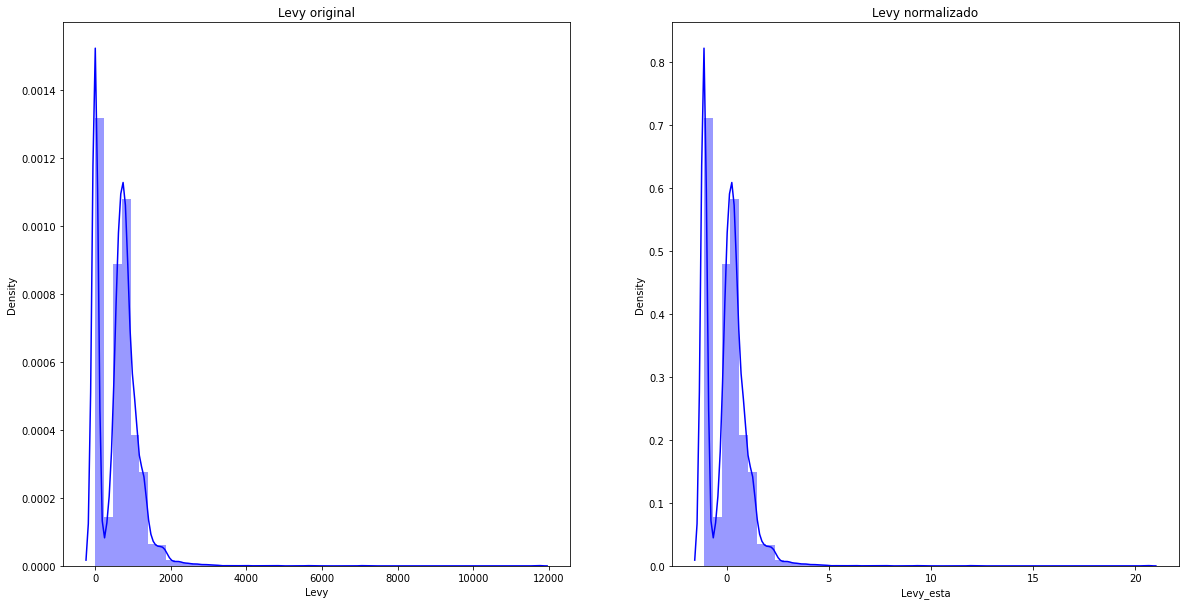

In [222]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Levy original')
axes[1].set_title('Levy normalizado')

sns.distplot(numericas['Levy'], color = 'blue', ax = axes[0])
sns.distplot(numericas['Levy_esta'], color = 'blue', ax = axes[1]);

Chequeemos que la media de los datos sea igual a 0 y la desviación igual a 1:

In [223]:
print(f'La media de la columna Levy_esta es:  {np.round(numericas["Levy_esta"].mean(),1)}')
print(f'La desviación estándar de la columna Levy_esta es: {np.round(numericas["Levy_esta"].std(),1)}')

La media de la columna Levy_esta es:  -0.0
La desviación estándar de la columna Levy_esta es: 1.0


### <font color=violet> Sklearn StandardScaler

In [232]:
numericas.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
ID,,,,,
45654403,1399,2010,186005,6.0,12
44731507,1018,2011,192000,6.0,8


La estandarización solo se hace para las variables predictoras. Por lo tanto, lo primero que tenemos que hacer es quitar de nuestro dataframe de "numericas" las columnas de la variable respuesta, es decir, Price, Price_log y Levy_esta.

In [233]:
numericas.drop(["Price", 'Price_log', 'Levy_esta'], axis = 1, inplace = True)
numericas.head(2)

KeyError: "['Price', 'Price_log', 'Levy_esta'] not found in axis"

In [234]:
scaler = StandardScaler()

In [235]:
scaler.fit(numericas)

StandardScaler()

In [236]:
X_escaladas = scaler.transform(numericas)
X_escaladas

array([[ 1.47578103, -0.41124831, -0.02105325,  1.37531341,  1.32940559],
       [ 0.77054097, -0.17333693, -0.0208972 ,  1.37531341,  0.31966836],
       [-1.11380123, -1.36289383, -0.02068897, -0.41109483, -1.19493749],
       ...,
       [-1.11380123, -2.07662796, -0.02016837,  1.37531341, -1.6998061 ],
       [ 0.42439953, -0.17333693, -0.02168851, -0.41109483,  0.31966836],
       [ 0.43365465, -0.41124831, -0.02286596, -0.41109483, -0.69006887]])

In [237]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,1.475781,-0.411248,-0.021053,1.375313,1.329406
1,0.770541,-0.173337,-0.020897,1.375313,0.319668


Sacamos los valores de media y desviación estándar para las columnas numéricas estandarizadas

In [238]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Levy es:  -1.3390675821156186e-16
La desviación estándar de la columna Levy es: 1.0000368100417918
-------------------------------------------------------------
La media de la columna Prod. year es:  -5.361501061205114e-15
La desviación estándar de la columna Prod. year es: 1.0000368100417918
-------------------------------------------------------------
La media de la columna Mileage es:  -4.184586194111308e-18
La desviación estándar de la columna Mileage es: 1.000036810041792
-------------------------------------------------------------
La media de la columna Cylinders es:  2.9919791287895856e-16
La desviación estándar de la columna Cylinders es: 1.000036810041792
-------------------------------------------------------------
La media de la columna Airbags es:  1.883063787350089e-17
La desviación estándar de la columna Airbags es: 1.000036810041792
-------------------------------------------------------------


Vamos a comprobar visualmente que todas nuestras columnas están en las mismas unidades.

In [239]:
numericas_estandar.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,1.475781,-0.411248,-0.021053,1.375313,1.329406
1,0.770541,-0.173337,-0.020897,1.375313,0.319668


In [240]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
Levy,13584.0,-1.339068e-16,1.000037,-1.113801,-1.113801,0.070854,0.535461,20.569091
Prod. year,13584.0,-5.361501e-15,1.000037,-2.552451,-0.411248,0.064574,0.778309,1.967865
Mileage,13584.0,-4.184586e-18,1.000037,-0.025895,-0.024125,-0.022787,-0.021389,55.872388
Cylinders,13584.0,2.991979e-16,1.000037,-3.090707,-0.411095,-0.411095,-0.411095,10.307355
Airbags,13584.0,1.883064e-17,1.000037,-1.699806,-0.690069,-0.185200,1.329406,2.339143


In [199]:
#fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))

#columnas_estandar = numericas_estandar.columns
#axes = axes.flat


#for i, colum in enumerate(columnas_estandar): 
    #sns.histplot(
       # data = numericas_estandar,
       # x = colum,
       # kde = True,  
       # line_kws = {"linewidth": 2}, 
       # alpha = 0.2, 
       # ax = axes[i])
    
    
    #axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    #axes[i].tick_params(labelsize = 20)
    #axes[i].set_xlabel("")


In [241]:
df.dtypes

Price                  int64
Levy                   int64
Manufacturer          object
Prod. year             int64
Category              object
Leather interior      object
Fuel type             object
Engine volume         object
Mileage                int64
Cylinders            float64
Gear box type         object
Drive wheels          object
Doors               category
Color                 object
Airbags                int64
Price_log            float64
dtype: object

### <font color=violet> Sklearn RobustScaler

In [242]:
robust = RobustScaler()

In [243]:
robust.fit(numericas)

RobustScaler()

In [244]:
X_robust = robust.transform(numericas)

In [245]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,Levy,Prod. year,Mileage,Cylinders,Airbags
0,0.851852,-0.4,0.633851,2.0,0.75
1,0.424242,-0.2,0.690891,2.0,0.25


In [246]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Levy es:  -0.042961019698357715
La desviación estándar de la columna Levy es: 0.6063540528140895
-------------------------------------------------------------
La media de la columna Prod. year es:  -0.054284452296819795
La desviación estándar de la columna Prod. year es: 0.8406801026756252
-------------------------------------------------------------
La media de la columna Mileage es:  8.329454297876902
La desviación estándar de la columna Mileage es: 365.5438660294833
-------------------------------------------------------------
La media de la columna Cylinders es:  0.46024734982332155
La desviación estándar de la columna Cylinders es: 1.1196061339071104
-------------------------------------------------------------
La media de la columna Airbags es:  0.0917071554770318
La desviación estándar de la columna Airbags es: 0.49519656264179396
-------------------------------------------------------------


In [205]:
#fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

#columnas_robust = numericas_robust.columns
#axes = axes.flat


#for i, colum in enumerate(columnas_estandar): 
    #sns.histplot(
        #data = numericas_robust,
        #x = colum,
        #kde = True,  
        #line_kws = {"linewidth": 2}, 
        #alpha = 0.2, 
        #ax = axes[i])
    
    
    #axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    #axes[i].tick_params(labelsize = 20)
    #axes[i].set_xlabel("")

In [247]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_log
ID,,,,,,,,,,,,,,,,
45654403,13328,NaN,LEXUS,NaN,Jeep,Yes,Hybrid,3.5,NaN,NaN,Automatic,4x4,04,Silver,NaN,9.497622
44731507,16621,NaN,CHEVROLET,NaN,Jeep,No,Petrol,3,NaN,NaN,Tiptronic,4x4,04,Black,NaN,9.718422
45774419,8467,NaN,HONDA,NaN,Hatchback,No,Petrol,1.3,NaN,NaN,Variator,Front,04,Black,NaN,9.043932
45769185,3607,NaN,FORD,NaN,Jeep,Yes,Hybrid,2.5,NaN,NaN,Automatic,4x4,04,White,NaN,8.190632
45809263,11726,NaN,HONDA,NaN,Hatchback,Yes,Petrol,1.3,NaN,NaN,Automatic,Front,04,Silver,NaN,9.369564


In [248]:
df.dtypes

Price                  int64
Levy                 float64
Manufacturer          object
Prod. year           float64
Category              object
Leather interior      object
Fuel type             object
Engine volume         object
Mileage              float64
Cylinders            float64
Gear box type         object
Drive wheels          object
Doors               category
Color                 object
Airbags              float64
Price_log            float64
dtype: object

Eliminamos la columna de Price porque ya tenemos Price_log

In [207]:
df.drop("Price", axis = 1, inplace = True)

In [208]:
df.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Color', 'Airbags', 'Price_log'],
      dtype='object')

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [209]:
df.to_pickle('datos/cars_price_norm_est')

In [210]:
df.to_csv('datos/cars_price_norm_est.csv')